In [1]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = [8,8]

In [3]:
df= pd.read_csv('../input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.duplicated().sum() # checking duplicated values

0

<AxesSubplot:>

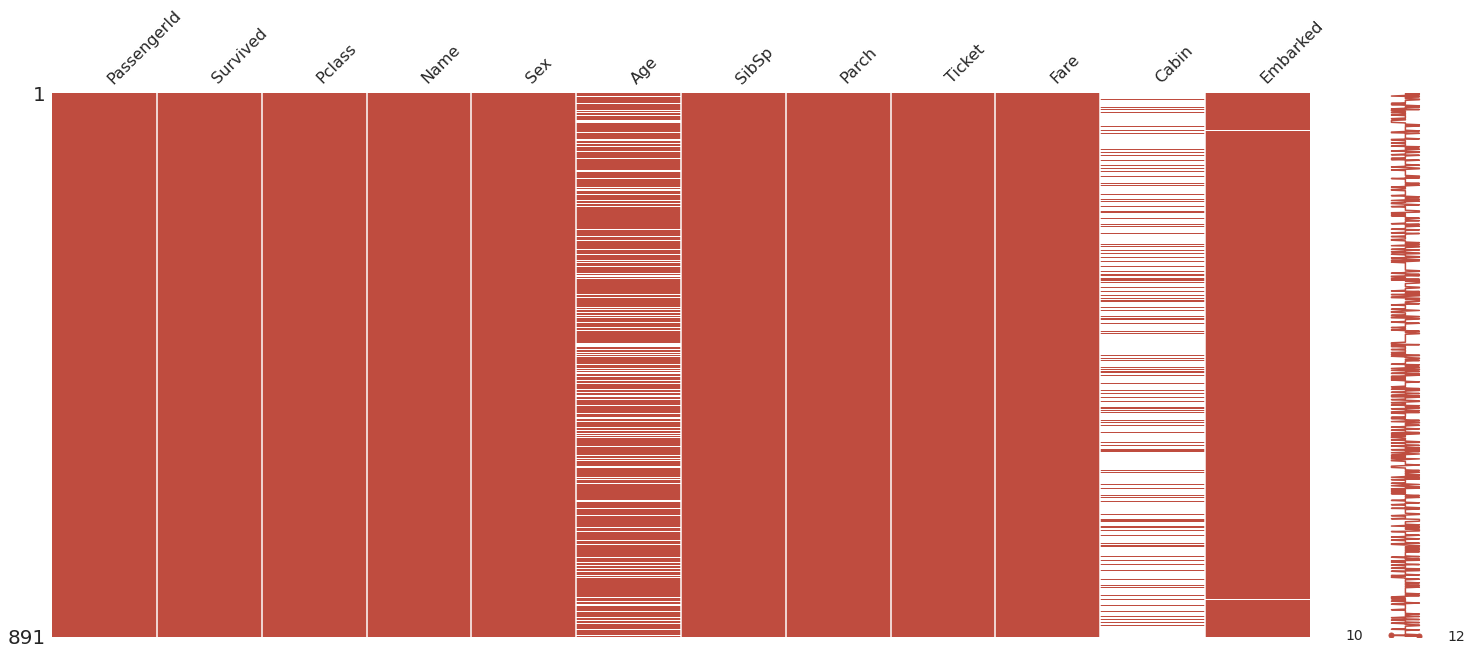

In [8]:
# heatmap for complete dataset to check missing values
msno.matrix(df,color=(0.75, 0.3, 0.25))

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# getting percentage of missing values 
df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


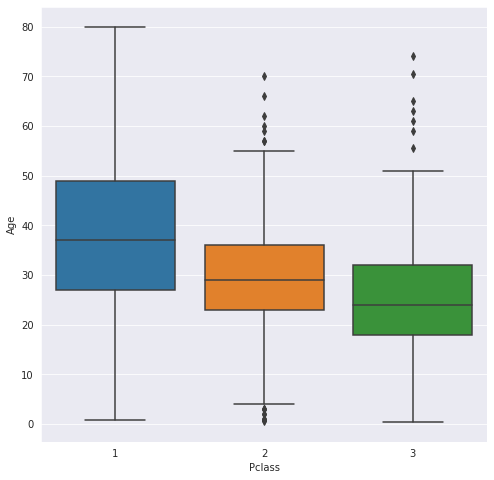

In [11]:
sns.boxplot(x='Pclass',y='Age', data=df);

print(df.groupby('Pclass')['Age'].median())

<AxesSubplot:>

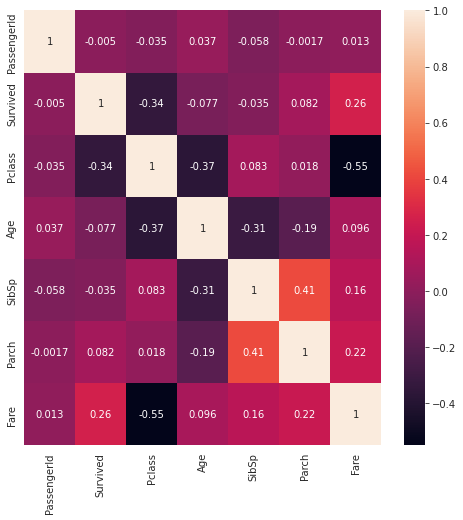

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
#dataset'n kopyasini olusturma
df_copy=df[['Pclass', 'Age']]

In [14]:
for i in (df_copy.index):
    
    if math.isnan(df_copy.loc[i, 'Age']):
        
        # for class 1
        if df_copy.loc[i,'Pclass']==1:
            df_copy.loc[i,'Age']= 37
            
        # for class 2
        elif df_copy.loc[i,'Pclass']==2:
            df_copy.loc[i,'Age']= 29
            
        # for class 3
        else:
            df_copy.loc[i, 'Age']=24

In [15]:
# Replacing age column in df with new one
df['Age']= df_copy['Age']

In [16]:
df.drop(columns=['Cabin'], inplace=True)

In [17]:
mode= df.Embarked.mode()
df['Embarked'].fillna(mode[0], inplace=True)

In [18]:
# validating that missing values are removed

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

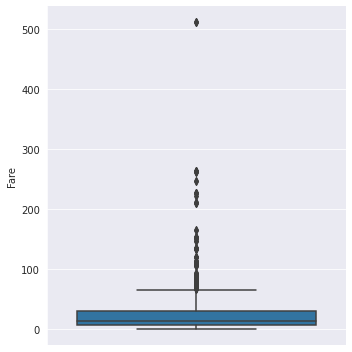

In [19]:
sns.catplot(y= 'Fare', data=df, kind='box');

In [20]:
# getting index values for rows where fare is more than 500 USD
index= df[df['Fare']>500].index


# dropping rows with index values
df.drop(index= index, inplace =True)

In [21]:
df['Family']= df['SibSp'] + df['Parch']
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0


In [22]:
df.drop(columns=['Ticket'], inplace=True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0


In [23]:
df['Travelling']=df['Family'].apply(lambda x: 'alone' if x==0 else 'group')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Travelling
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,group
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,group
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,alone


In [24]:
#en genc yolcular
df.query('Age<20').shape[0]

164

In [25]:
# youngest passenger onboard
print('Age of youngest passenger is {} years'.format(df['Age'].min()))

# youngest passengers who died
print('Age of youngest passenger who died is {} years'.format(df[df['Survived']==0]['Age'].min()))

# youngest female passenger who died
print('Age of youngest female passenger who die is {} years'.format(df[df['Sex']=='female'][df['Survived']==0]['Age'].min()))

Age of youngest passenger is 0.42 years
Age of youngest passenger who died is 1.0 years
Age of youngest female passenger who die is 2.0 years


In [26]:
# Extracting other info from the dataset for yongest passenger/s who died
df[(df['Age']==1.0) & (df['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Travelling
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,39.6875,S,5,group
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,46.9000,S,7,group


In [27]:
# Youngest female passengers who lost their lives
df[(df['Age']==2.0) & (df['Sex']=='female')&(df['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Travelling
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,31.2750,S,6,group
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,10.4625,S,1,group
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,3,group
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,27.9000,S,5,group


In [28]:
# Extracting unique values from all columns
dict_uniques= {}

for col in df:
    
    if len(df[col].unique())< 5:
        
        dict_uniques[col]=df[col].unique()
                                
        
    else:
        continue
        
print(dict_uniques)

{'Survived': array([0, 1]), 'Pclass': array([3, 1, 2]), 'Sex': array(['male', 'female'], dtype=object), 'Embarked': array(['S', 'C', 'Q'], dtype=object), 'Travelling': array(['group', 'alone'], dtype=object)}


In [29]:
dict_uniques.keys()

dict_keys(['Survived', 'Pclass', 'Sex', 'Embarked', 'Travelling'])

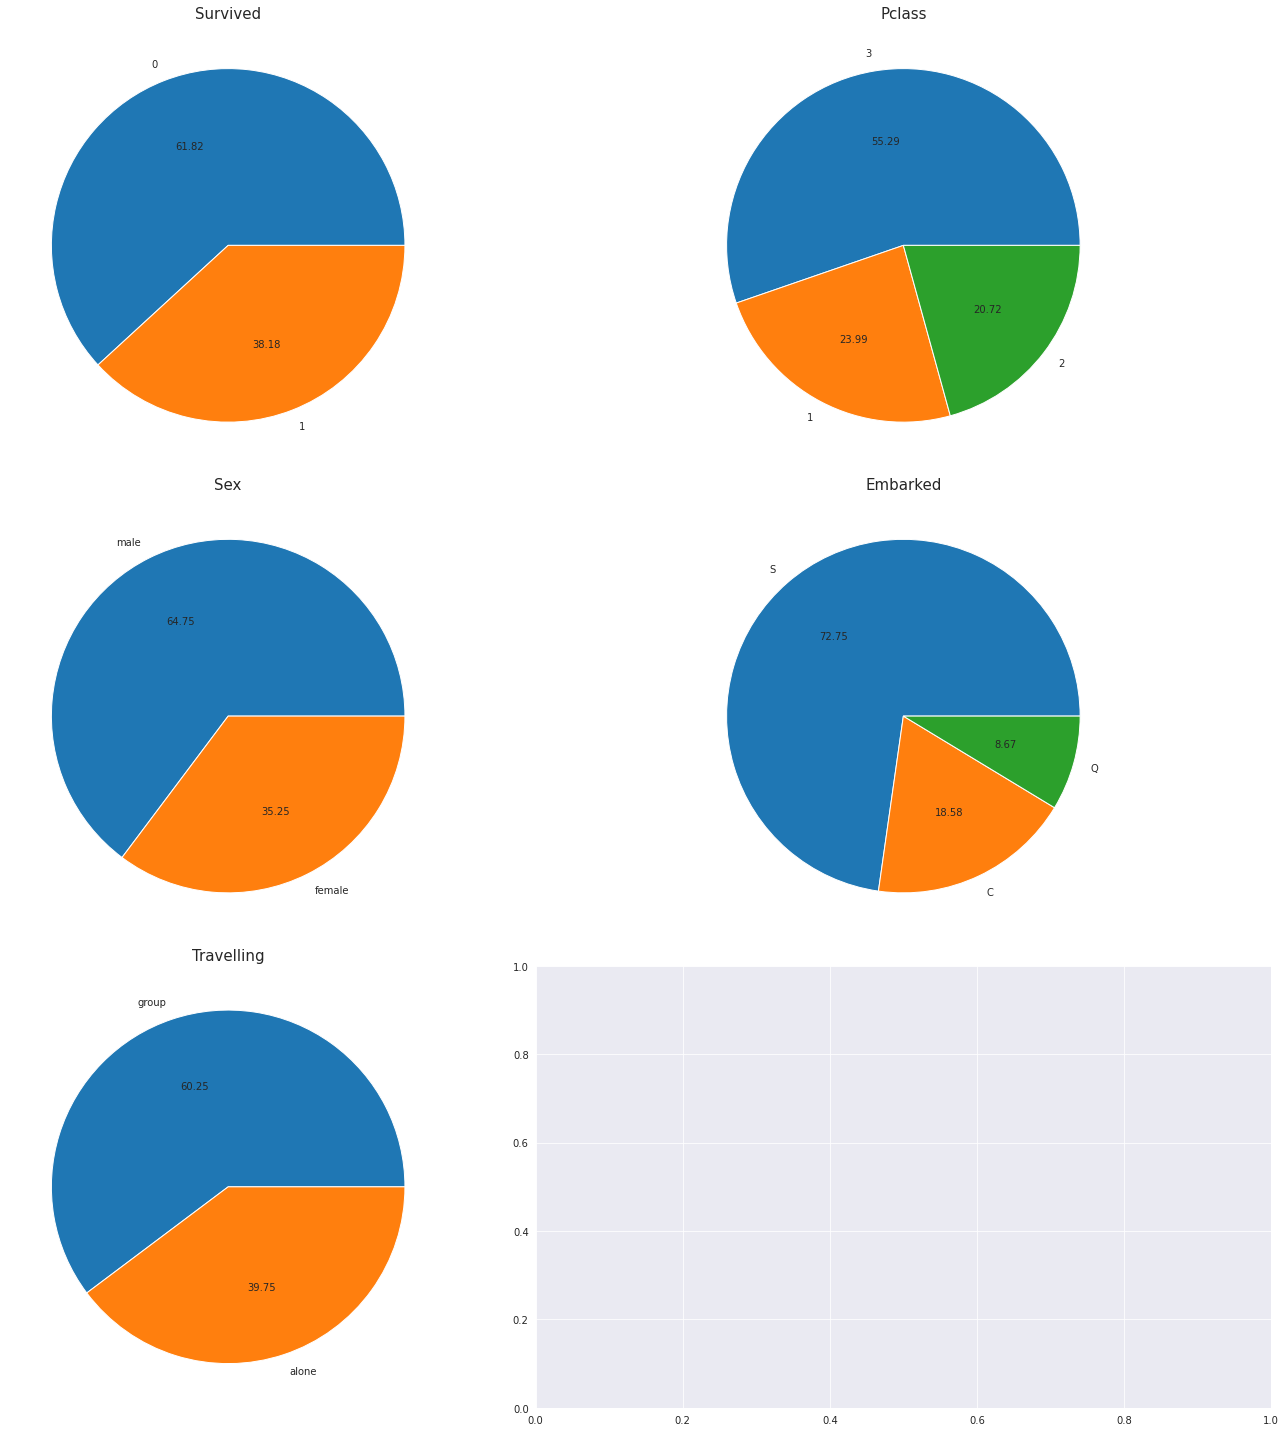

In [30]:
# Extracting list of column variables 
columns= dict_uniques.keys()

fig, ax= plt.subplots(3,2, figsize=(20,20))

for col, ax in zip(columns, ax.flatten()):
    ax.pie(df[col].value_counts(), labels= df[col].unique(), autopct='%2.2f')
    ax.set_title(col.title(), fontsize=15)
   
plt.tight_layout()

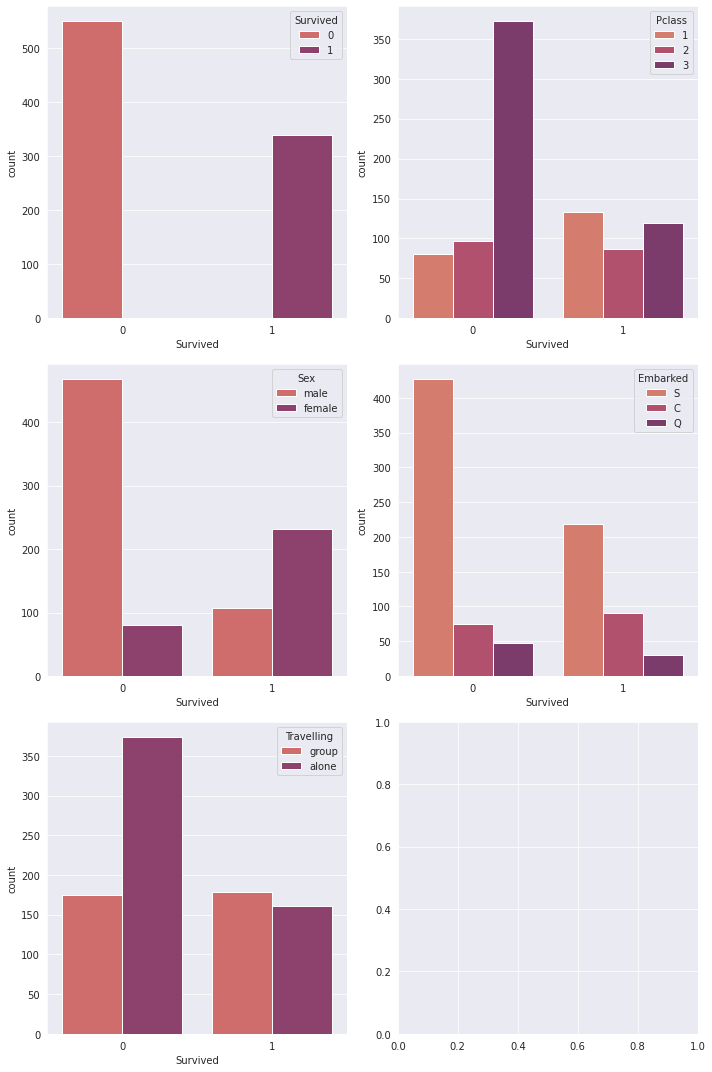

In [31]:
#survival analiysy
#hue = ['Sex','Pclass','Embarked']

hue= dict_uniques.keys()
fig, ax=plt.subplots(3,2, figsize=(10,15))

for col, ax in zip(hue, ax.flatten()):
    
    sns.countplot(x='Survived', data=df, hue=col, ax=ax, palette='flare');

plt.tight_layout()


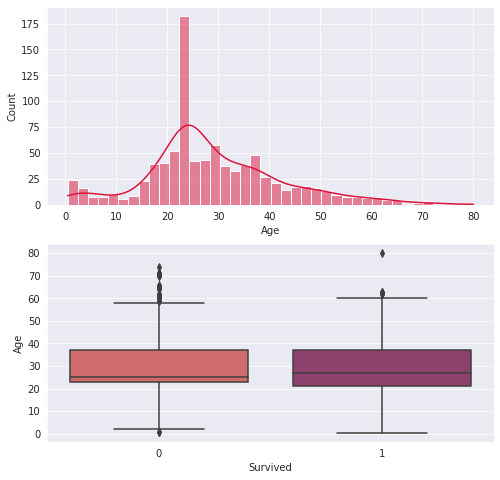

In [32]:
#analysing age distribution
df_na =df.dropna(subset=['Age'])
plt.subplot(2,1,1)
sns.histplot(x='Age', data=df_na, kde=True, bins=40, color='crimson')
ax.set_title('Age Distribution')

plt.subplot(2,1,2);
sns.boxplot(y='Age', x='Survived', data=df_na, palette='flare');

print()

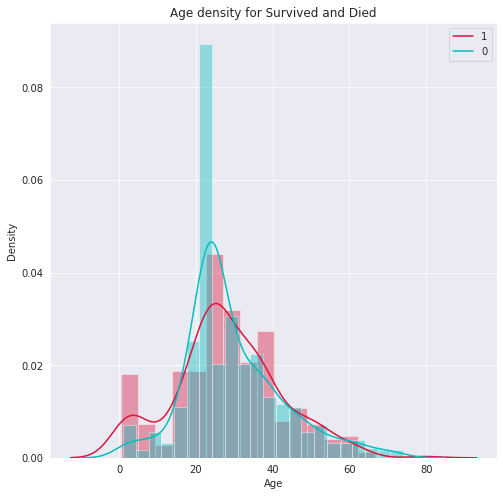

In [33]:
# Age distribution based on survived and died

plt.figure(figsize=(8,8))
sns.distplot(df[df['Survived']==1]['Age'], color='crimson')
sns.distplot(df[df['Survived']==0]['Age'], color='c')
plt.legend([1,0])
plt.title('Age density for Survived and Died');

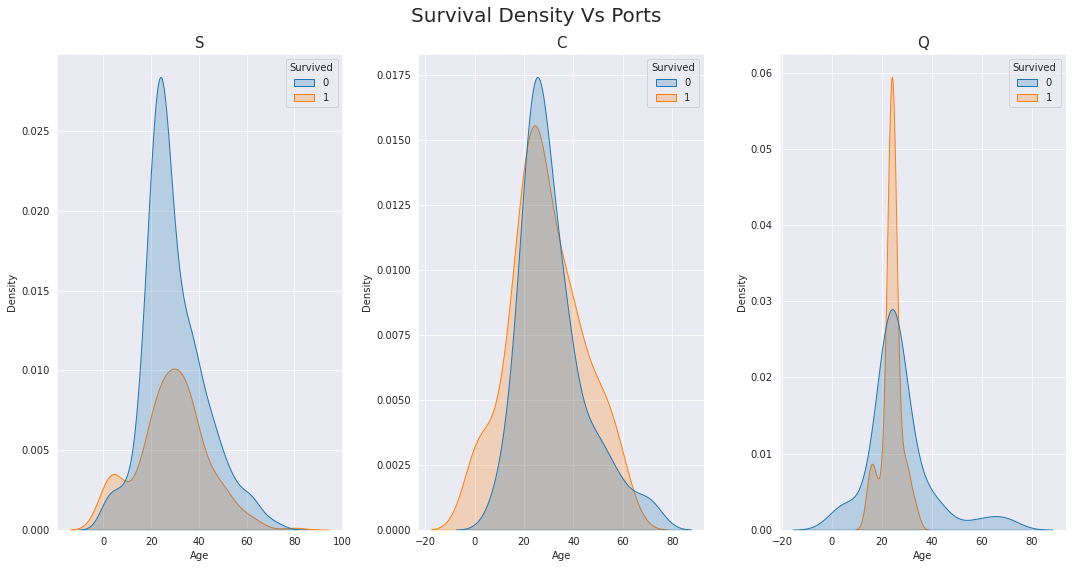

In [34]:
#Survival density vs Ports
fig, ax= plt.subplots(1,3, figsize= (15,8))
for port, ax in zip(df.Embarked.unique(), ax.flatten()):
    
    df_port = df[df['Embarked']==port]
    sns.kdeplot('Age', data=df_port, hue='Survived', shade=True, ax=ax)
    
    ax.set_title(port.title(), fontsize=15)

plt.suptitle('Survival Density vs Ports'.title(), fontsize=20)
    
plt.tight_layout()


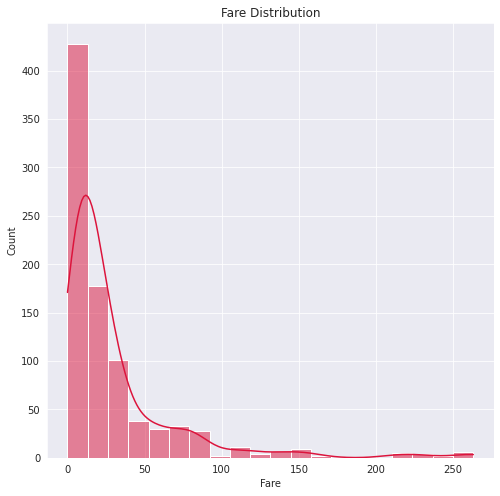

In [35]:
#Fare Distribution
sns.histplot(x='Fare', data=df, bins=20, color='crimson', kde=True)
plt.title('Fare Distribution');

In [36]:
print('Median fare is:',df['Fare'].median())
print('Mean fare is:',df['Fare'].mean())

Median fare is: 14.4542
Mean fare is: 30.582164076576575


Embarked
C    51.729143
Q    13.276030
S    27.243651
Name: Fare, dtype: float64


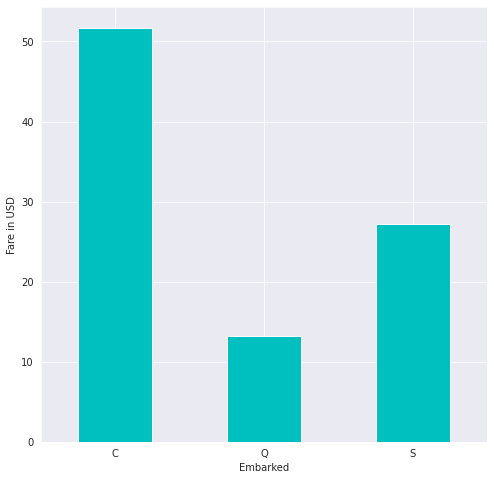

In [37]:
#Average fare based on Embarked port
port= df.groupby('Embarked')['Fare'].mean()
print(port)
port.plot(kind='bar', color='c')
plt.xticks(rotation=360)
plt.ylabel('Fare in USD');

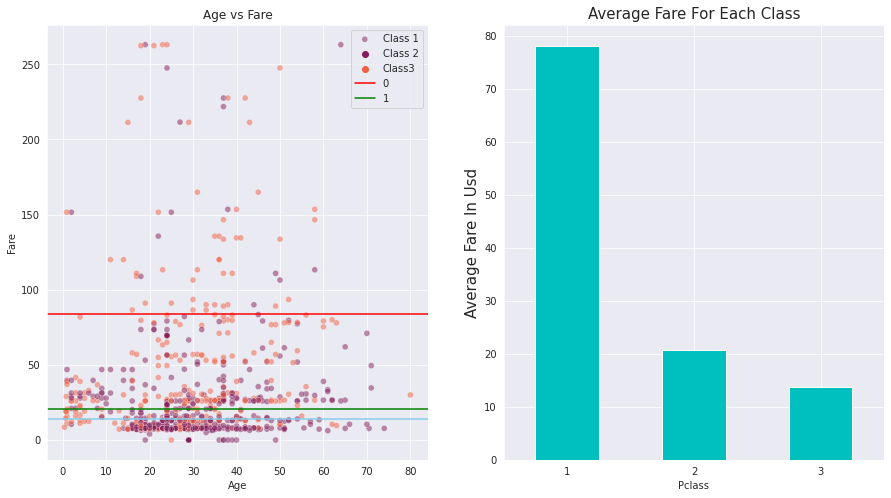

In [38]:
#Age vs Fare
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Age',y='Fare', data=df, hue='Survived',palette='rocket', alpha=0.5)
df_class= df.groupby('Pclass')['Fare'].mean()
plt.axhline(y=84.15, c='r', label='Class 1')
plt.axhline(y=20.66, c='g', label='Class 2')
plt.axhline(y=13.67, c='skyblue', label='Class 3')
plt.legend(['Class 1', 'Class 2','Class3','0','1'])
plt.title('Age vs Fare')

plt.subplot(1,2,2)
df_class= df.groupby('Pclass')['Fare'].mean()
df_class.plot(kind='bar', color='c')
plt.xticks(rotation=360)
plt.title('Average Fare for each class'.title(), fontsize=15)
plt.ylabel('Average Fare in USD'.title(), fontsize=15);

In [39]:
print('Relationship between Age and Fare:', df['Age'].corr(df['Fare']))
print('Relationship between Pclass and Fare:', df['Pclass'].corr(df['Fare']))

Relationship between Age and Fare: 0.13099798421369366
Relationship between Pclass and Fare: -0.6049601806405529


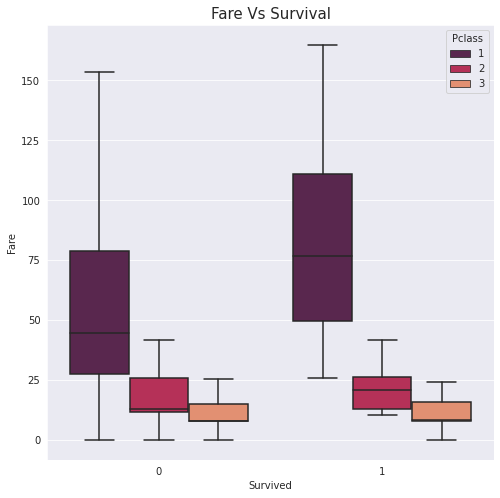

In [40]:
sns.boxplot(x='Survived', y='Fare', data=df, showfliers=False, hue='Pclass', palette='rocket')
plt.title('Fare vs Survival'.title(), fontsize=15);

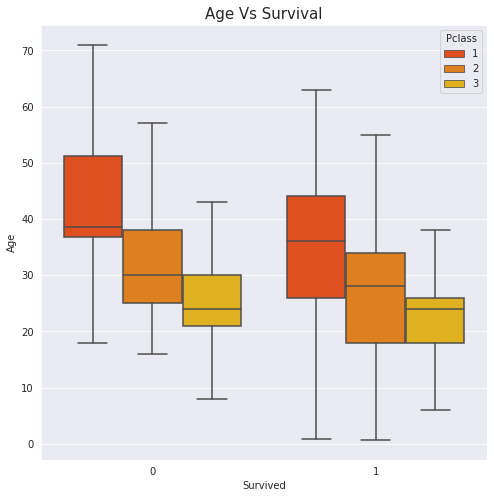

In [41]:
#Relationship between Age and Survival Rate
sns.boxplot(x='Survived', y='Age', data=df, hue='Pclass', showfliers=False, palette='autumn')
plt.title('Age vs Survival'.title(), fontsize=15);

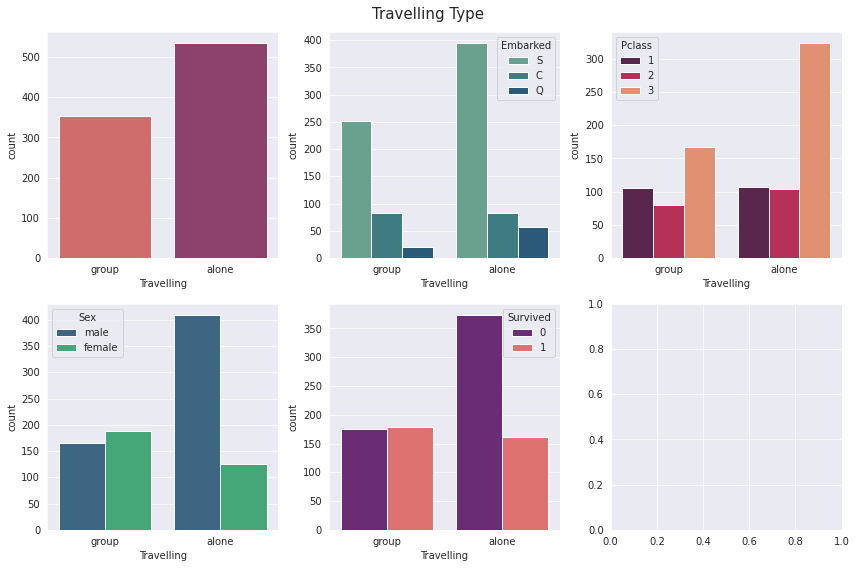

In [42]:
#Travelling type and Survival rate
fig, ax= plt.subplots(2,3, figsize=(12,8))
ax[0,0]= sns.countplot(x='Travelling', data=df, ax=ax[0,0],palette='flare')
ax[0,1]= sns.countplot(x='Travelling', hue='Embarked', data=df, ax=ax[0,1], palette='crest')
ax[0,2]= sns.countplot(x='Travelling', hue='Pclass', data=df, ax=ax[0,2], palette='rocket')
ax[1,0]= sns.countplot(x='Travelling', hue='Sex', data=df, ax=ax[1,0], palette='viridis')
ax[1,1]= sns.countplot(x='Travelling', hue='Survived', data=df, ax=ax[1,1], palette='magma')

plt.suptitle('Travelling Type'.title(), fontsize=15)
plt.tight_layout()

In [43]:
df.groupby('Travelling')['Survived'].value_counts()

Travelling  Survived
alone       0           374
            1           161
group       1           178
            0           175
Name: Survived, dtype: int64